In [ ]:
Covid 19 Outbreak in Ontario

Data:Government of Canada Statistics/Public Health Agency of Canada
Status of COVID-19 cases in Ontario
    https://data.ontario.ca/dataset/status-of-covid-19-cases-in-ontario/resource/ed270bb8-340b-41f9-a7c6-e8ef587e6d11    
Confirmed positive cases of COVID19 in Ontario
    https://data.ontario.ca/dataset/confirmed-positive-cases-of-covid-19-in-ontario/resource/455fd63b-603d-4608-8216-7d8647f43350

In [1]:
# import libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go 
import cufflinks as cf
%matplotlib inline
import plotly.express as px

# For Notebooks
init_notebook_mode(connected=True)

In [2]:
# Hospitalized and in ICU with/out ventilator cases
# Assign url of file: url
url2='https://data.ontario.ca/dataset/f4f86e54-872d-43f8-8a86-3892fd3cb5e6/resource/ed270bb8-340b-41f9-a7c6-e8ef587e6d11/download/covidtesting.csv'
# Read file into a DataFrame
df=pd.read_csv(url2)

In [3]:
# Examine samples of the DataFrame
df.sample(5)

,Reported Date,Confirmed Negative,Presumptive Negative,Presumptive Positive,Confirmed Positive,Resolved,Deaths,Total Cases,Total patients approved for testing as of Reporting Date,Total tests completed in the last day,Under Investigation,Number of patients hospitalized with COVID-19,Number of patients in ICU with COVID-19,Number of patients in ICU on a ventilator with COVID-19
11,2020-02-11,184.0,79.0,0.0,3.0,NaN,NaN,3.0,285.0,NaN,19,NaN,NaN,NaN
63,2020-04-09,NaN,NaN,NaN,3254.0,2305.0,200.0,5759.0,88698.0,NaN,1208,632.0,264.0,214.0
51,2020-03-28,33240.0,NaN,NaN,1117.0,8.0,19.0,1144.0,43072.0,NaN,8690,NaN,NaN,NaN
9,2020-02-08,130.0,25.0,0.0,3.0,NaN,NaN,3.0,197.0,NaN,39,NaN,NaN,NaN
12,2020-02-12,257.0,44.0,0.0,2.0,1.0,NaN,3.0,313.0,NaN,9,NaN,NaN,NaN


In [4]:
# Examine the shape of the DataFrame
df.shape

(70, 14)

In [5]:
# Examine the summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 14 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Reported Date                                             70 non-null     object 
 1   Confirmed Negative                                        47 non-null     float64
 2   Presumptive Negative                                      12 non-null     float64
 3   Presumptive Positive                                      25 non-null     float64
 4   Confirmed Positive                                        68 non-null     float64
 5   Resolved                                                  58 non-null     float64
 6   Deaths                                                    30 non-null     float64
 7   Total Cases                                               68 non-null     float64
 8   Total patients approve

In [6]:
# Change the Reported Date column name to date
df.rename(columns={'Reported Date':'date'}, inplace=True)

#Change the 'date' object to datetime
df.date = pd.to_datetime(df.date)

In [7]:
# Count the number of missing values in each column
print(df.isnull().sum())

date                                                         0
Confirmed Negative                                          23
Presumptive Negative                                        58
Presumptive Positive                                        45
Confirmed Positive                                           2
Resolved                                                    12
Deaths                                                      40
Total Cases                                                  2
Total patients approved for testing as of Reporting Date     6
Total tests completed in the last day                       69
Under Investigation                                          0
Number of patients hospitalized with COVID-19               56
Number of patients in ICU with COVID-19                     56
Number of patients in ICU on a ventilator with COVID-19     56
dtype: int64


In [8]:
#Drop the 'Confirmed Negative', 'Presumptive Negative', 'Total tests completed in the last day', 'Under Investigation', 'Presumptive Positive', 'Confirmed Positive', 'Resolved', 'Total patients approved for testing as of Reporting Date', and 'Total Cases' columns
df.drop(['Confirmed Negative', 'Presumptive Negative','Total tests completed in the last day',  'Under Investigation', 'Presumptive Positive', 'Confirmed Positive', 'Resolved', 'Total patients approved for testing as of Reporting Date', 'Total Cases'], axis='columns', inplace=True)


In [9]:
df.tail()

,date,Deaths,Number of patients hospitalized with COVID-19,Number of patients in ICU with COVID-19,Number of patients in ICU on a ventilator with COVID-19
65,2020-04-11,253.0,691.0,257.0,215.0
66,2020-04-12,274.0,738.0,261.0,196.0
67,2020-04-13,291.0,760.0,263.0,203.0
68,2020-04-14,334.0,769.0,255.0,199.0
69,2020-04-15,385.0,795.0,254.0,188.0


In [10]:
df.fillna(0, inplace=True)

In [11]:
# The hospital data are available only for April 2nd and after.
df1=df[df['Number of patients hospitalized with COVID-19']!=0]

In [12]:
df1

,date,Deaths,Number of patients hospitalized with COVID-19,Number of patients in ICU with COVID-19,Number of patients in ICU on a ventilator with COVID-19
56,2020-04-02,53.0,405.0,167.0,112.0
57,2020-04-03,67.0,462.0,194.0,140.0
58,2020-04-04,94.0,506.0,196.0,152.0
59,2020-04-05,119.0,523.0,200.0,154.0
60,2020-04-06,132.0,589.0,216.0,160.0
61,2020-04-07,153.0,614.0,233.0,187.0
62,2020-04-08,174.0,605.0,246.0,195.0
63,2020-04-09,200.0,632.0,264.0,214.0
64,2020-04-10,222.0,673.0,260.0,217.0
65,2020-04-11,253.0,691.0,257.0,215.0


[Text(0, 0, '2020-04-02'),
 Text(0, 0, '2020-04-03'),
 Text(0, 0, '2020-04-04'),
 Text(0, 0, '2020-04-05'),
 Text(0, 0, '2020-04-06'),
 Text(0, 0, '2020-04-07'),
 Text(0, 0, '2020-04-08'),
 Text(0, 0, '2020-04-09'),
 Text(0, 0, '2020-04-10'),
 Text(0, 0, '2020-04-11'),
 Text(0, 0, '2020-04-12'),
 Text(0, 0, '2020-04-13'),
 Text(0, 0, '2020-04-14'),
 Text(0, 0, '2020-04-15')]

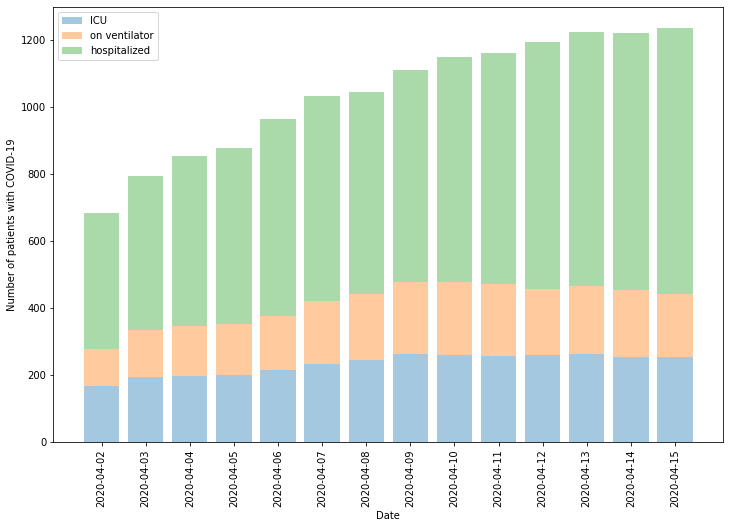

In [13]:
fig, ax=plt.subplots(figsize=(12,8))

ax.bar(df1['date'], df1['Number of patients in ICU with COVID-19'],  alpha=0.4, label='ICU')
ax.bar(df1['date'], df1['Number of patients in ICU on a ventilator with COVID-19'], bottom=df1['Number of patients in ICU with COVID-19'], alpha=.4, label='on ventilator')
ax.bar(df1['date'], df1['Number of patients hospitalized with COVID-19'], bottom=df1['Number of patients in ICU with COVID-19']+df1['Number of patients in ICU on a ventilator with COVID-19'], alpha=.4, label='hospitalized')

#['in ICU', 'in ICU on a ventilator', 'hospitalized']
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Number of patients with COVID-19')
ax.set_xticks(df1.date)
ax.set_xticklabels(df1.date.dt.strftime('%Y-%m-%d'),rotation=90)

In [15]:
#Confirmed positive cases of COVID19 in Ontario based on gender and age
url2='https://data.ontario.ca/dataset/f4112442-bdc8-45d2-be3c-12efae72fb27/resource/455fd63b-603d-4608-8216-7d8647f43350/download/conposcovidloc.csv'
df2=pd.read_csv(url2)

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8447 entries, 0 to 8446
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ROW_ID                     8447 non-null   int64  
 1   ACCURATE_EPISODE_DATE      8447 non-null   object 
 2   Age_Group                  8447 non-null   object 
 3   CLIENT_GENDER              8447 non-null   object 
 4   CASE_ACQUISITIONINFO       8447 non-null   object 
 5   OUTCOME1                   8447 non-null   object 
 6   Reporting_PHU              8447 non-null   object 
 7   Reporting_PHU_Address      8447 non-null   object 
 8   Reporting_PHU_City         8447 non-null   object 
 9   Reporting_PHU_Postal_Code  8447 non-null   object 
 10  Reporting_PHU_Website      8447 non-null   object 
 11  Reporting_PHU_Latitude     8447 non-null   float64
 12  Reporting_PHU_Longitude    8447 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage

In [17]:
df2.sample(3)

,ROW_ID,ACCURATE_EPISODE_DATE,Age_Group,CLIENT_GENDER,CASE_ACQUISITIONINFO,OUTCOME1,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
7908,7909,2020-03-12,20s,MALE,Travel-Related,Resolved,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
174,175,2020-03-18,30s,MALE,Information pending,Resolved,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
7407,7408,2020-03-16,60s,MALE,Contact of a confirmed case,Resolved,Simcoe Muskoka District Health Unit,15 Sperling Drive,Barrie,L4M 6K9,www.simcoemuskokahealth.org,44.410713,-79.686306


In [18]:
# Change the Reported Date column name to date and CLIENT GENDER column name to Gender
df2.rename(columns={'ACCURATE_EPISODE_DATE':'date', 'CLIENT_GENDER':'Gender'}, inplace=True)

#Change the 'date' object to datetime
df2.date = pd.to_datetime(df2.date)

df2.Gender= df2.Gender.astype('category')
df2.Age_Group= df2.Age_Group.astype('category')


In [19]:
df2.sort_values(by='date')

,ROW_ID,date,Age_Group,Gender,CASE_ACQUISITIONINFO,OUTCOME1,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
846,847,2020-01-21,50s,MALE,Travel-Related,Resolved,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
845,846,2020-01-22,50s,FEMALE,Travel-Related,Resolved,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
847,848,2020-01-24,20s,FEMALE,Travel-Related,Resolved,Middlesex-London Health Unit,50 King Street,London,N6A 5L7,www.healthunit.com,42.981468,-81.254016
63,64,2020-02-01,70s,FEMALE,Neither,Not Resolved,"Region of Waterloo, Public Health",99 Regina Street South,Waterloo,N2J 4V3,www.chd.region.waterloo.on.ca,43.462876,-80.520913
848,849,2020-02-05,20s,FEMALE,Travel-Related,Resolved,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5874,5875,2020-04-14,80s,MALE,Information pending,Not Resolved,Windsor-Essex County Health Unit,1005 Ouellette Avenue,Windsor,N9A 4J8,www.wechu.org,42.308796,-83.033670
7962,7963,2020-04-14,60s,FEMALE,Information pending,Not Resolved,Windsor-Essex County Health Unit,1005 Ouellette Avenue,Windsor,N9A 4J8,www.wechu.org,42.308796,-83.033670
5066,5067,2020-04-14,30s,FEMALE,Information pending,Not Resolved,"Leeds, Grenville and Lanark District Health Unit",458 Laurier Boulevard,Brockville,K6V 7A3,www.healthunit.org,44.615843,-75.702833
5056,5057,2020-04-14,50s,FEMALE,Information pending,Not Resolved,Durham Region Health Department,605 Rossland Road East,Whitby,L1N 0B2,www.durham.ca/en/health-and-wellness/health-an...,43.898605,-78.940341


In [20]:
df2.OUTCOME1.value_counts()

Not Resolved    4160
Resolved        3902
Fatal            385
Name: OUTCOME1, dtype: int64

In [21]:
# percent of confirmed cases based on gender
df2.Gender.value_counts(normalize=True)

FEMALE         0.558778
MALE           0.435539
UNKNOWN        0.005446
TRANSGENDER    0.000118
OTHER          0.000118
Name: Gender, dtype: float64

In [22]:
# confirmed cases based on gender
df2.Gender.value_counts()

FEMALE         4720
MALE           3679
UNKNOWN          46
TRANSGENDER       1
OTHER             1
Name: Gender, dtype: int64

In [23]:
# Deceased cases
Deceased=df2[df2.OUTCOME1=='Fatal'][['date','Age_Group','Gender']].sort_values('date')
Deceased

,date,Age_Group,Gender
1768,2020-03-01,70s,FEMALE
4391,2020-03-04,50s,MALE
2154,2020-03-05,80s,MALE
805,2020-03-06,80s,MALE
2431,2020-03-06,70s,MALE
...,...,...,...
1379,2020-04-10,80s,FEMALE
7731,2020-04-11,90s,MALE
2973,2020-04-11,90s,FEMALE
1603,2020-04-12,50s,MALE


In [24]:
Deceased.Gender.value_counts(normalize=True)

MALE           0.506494
FEMALE         0.480519
UNKNOWN        0.012987
TRANSGENDER    0.000000
OTHER          0.000000
Name: Gender, dtype: float64

In [25]:
# Deceased age group
Deceased.Age_Group.value_counts(normalize=True)

80s        0.353247
90s        0.288312
70s        0.223377
60s        0.075325
50s        0.038961
40s        0.018182
30s        0.002597
Unknown    0.000000
<20        0.000000
20s        0.000000
Name: Age_Group, dtype: float64

In [26]:
fig = px.histogram(Deceased, x="date")

fig.show()

In [27]:
Deceased['Female'] = Deceased.Gender=='FEMALE'
Deceased['Male'] = Deceased.Gender=='MALE'
Deceased['Unknown'] = Deceased.Gender=='UNKNOWN'

In [28]:
# Grouping the deceased cases based on age group
Deceased['Age_Group'].unique()

[70s, 50s, 80s, 60s, 90s, 40s, 30s]
Categories (7, object): [70s, 50s, 80s, 60s, 90s, 40s, 30s]

In [34]:
Deceased_G=Deceased[Deceased['Age_Group']!='Unknown'].groupby(['Age_Group'], as_index=False)[['Female','Male','Unknown']].agg(sum)


In [35]:
Deceased_G

,Age_Group,Female,Male,Unknown
0,20s,0.0,0.0,0.0
1,30s,0.0,1.0,0.0
2,40s,1.0,6.0,0.0
3,50s,7.0,8.0,0.0
4,60s,11.0,18.0,0.0
5,70s,31.0,54.0,1.0
6,80s,73.0,62.0,1.0
7,90s,62.0,46.0,3.0
8,<20,0.0,0.0,0.0
9,Unknown,0.0,0.0,0.0


In [36]:
fig = go.Figure(data=[
    go.Bar(name='Female', x=Deceased_G.Age_Group, y=Deceased_G.Female),
    go.Bar(name='Male', x=Deceased_G.Age_Group, y=Deceased_G.Male),
    go.Bar(name='Unknown', x=Deceased_G.Age_Group, y=Deceased_G.Unknown)
])

fig.update_layout(title_text='Deceased Age_Gender Distribution', barmode='group', xaxis_tickangle=-45, xaxis_title='Age Group', yaxis_title='Number of Cases')
fig.show()

In [37]:
# Age group of Confirmed cases with unknown gender
Confirmed_GenderUnknown_Ages=df2[(df2.Gender=='UNKNOWN')]['Age_Group']

In [38]:
Confirmed_GenderUnknown_Ages.value_counts(normalize=True)

90s        0.391304
80s        0.173913
60s        0.086957
50s        0.086957
70s        0.065217
40s        0.065217
30s        0.065217
20s        0.065217
Unknown    0.000000
<20        0.000000
Name: Age_Group, dtype: float64

In [39]:
#subset the confirmed cases from gender caregory(male,female,unknown)
df4=df2[((df2.Gender=='MALE')|(df2.Gender=='FEMALE')|(df2.Gender=='UNKNOWN'))&(df2.Age_Group!='Unknown')][['date','Age_Group','Gender','OUTCOME1']]

In [40]:
df4.shape

(8440, 4)

In [41]:
df4.head()

,date,Age_Group,Gender,OUTCOME1
0,2020-03-27,50s,MALE,Resolved
1,2020-03-25,20s,FEMALE,Resolved
2,2020-03-29,50s,FEMALE,Resolved
3,2020-03-26,40s,MALE,Resolved
4,2020-03-24,40s,FEMALE,Resolved


In [42]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8440 entries, 0 to 8446
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       8440 non-null   datetime64[ns]
 1   Age_Group  8440 non-null   category      
 2   Gender     8440 non-null   category      
 3   OUTCOME1   8440 non-null   object        
dtypes: category(2), datetime64[ns](1), object(1)
memory usage: 214.9+ KB


In [43]:
df4.Age_Group.value_counts()

50s        1549
40s        1244
60s        1192
30s        1048
20s         949
80s         881
70s         797
90s         589
<20         191
Unknown       0
Name: Age_Group, dtype: int64

In [44]:
df4.Age_Group.value_counts(normalize=True)

50s        0.183531
40s        0.147393
60s        0.141232
30s        0.124171
20s        0.112441
80s        0.104384
70s        0.094431
90s        0.069787
<20        0.022630
Unknown    0.000000
Name: Age_Group, dtype: float64

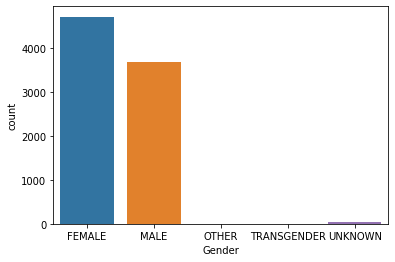

In [45]:
sns.countplot(x='Gender', data=df2)

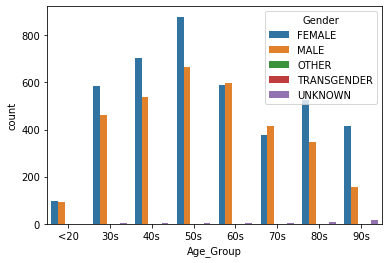

In [46]:
sorted_age_names=['<20','30s','40s','50s','60s','70s','80s','90s']
sns.countplot(x='Age_Group', data=df2, order=sorted_age_names, hue='Gender')

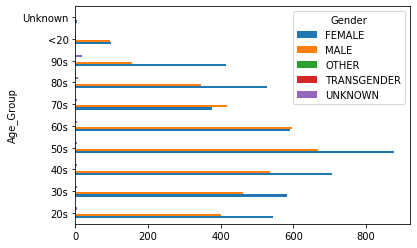

In [47]:
pd.crosstab(df2.Age_Group, df2.Gender).plot(kind='barh')

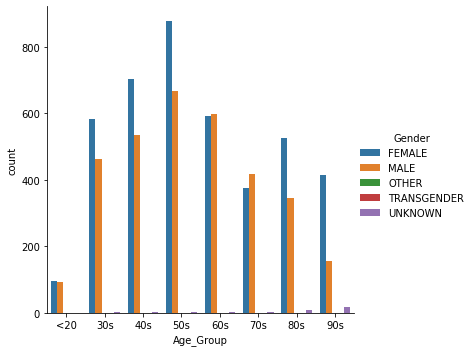

In [48]:
sns.catplot(x="Age_Group", hue='Gender', kind="count", data=df2, order=sorted_age_names)